For this example, we will start from a single gene, and identify all mutations that occur on it. 

In [2]:
import matplotlib.pyplot as plt
import pandas
import gripql
conn = gripql.Connection("https://bmeg.io/api", credential_file="bmeg_credentials.json")
G = conn.graph("rc5")

Get BRCA1 start and stop locations

In [3]:
loc = G.query().V().hasLabel("Gene").has(gripql.eq("symbol", "BRCA1")).render(["$.start", "$.end"]).execute()[0]

[INFO]	2020-01-14 14:12:16,554	1 results received in 0 seconds


Run an aggregation query to count up all the mutations

In [18]:
counts = [0] * (loc[1]-loc[0])
q = G.query().V().hasLabel("Gene").has(gripql.eq("symbol", "BRCA1"))
q = q.out("alleles").has(gripql.and_(gripql.eq("variant_type", "SNP"), 
                                     gripql.gte("start", loc[0]),
                                     gripql.lte("end", loc[1])))
q = q.aggregate(gripql.term("brac1_pos", "start"))
res = list(q)[0]
for v in res.brac1_pos.buckets:
    counts[ v['key'] - loc[0] ] = v['value']

[INFO]	2020-01-14 14:17:12,740	1 results received in 0 seconds


Save as a dataframe

In [20]:
s = pandas.DataFrame(counts)

Plot the hotspots

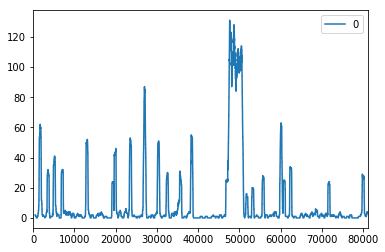

In [21]:
s.rolling(500).sum().plot()